In [76]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import sklearn as skl

In [77]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [78]:
encoded = pd.get_dummies(insurance)
encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [79]:
x = encoded.iloc[:, :-1]
y = encoded.iloc[:, -1]

In [80]:
from sklearn.model_selection import train_test_split

xtr, xtest, ytr, test = train_test_split(x,y, random_state = 42)

In [81]:
encoded.shape

(1338, 12)

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential ([
    Dense(12, activation = 'relu'),
    Dense(25, activation = 'relu'),
    Dense(10, activation = 'relu'),
    Dense(1)
])

In [83]:
model.compile(loss = 'mse', optimizer = tf.keras.optimizers.Adam (lr = 0.001), metrics = 'mse' )

In [84]:
rec = model.fit(xtr, ytr, epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 5569932.5000 - mse: 5569932.5000
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 461353.7500 - mse: 461353.7500
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 116421.0000 - mse: 116421.0000
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 73339.7344 - mse: 73339.7344
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 44561.3281 - mse: 44561.3281


Text(0.5, 0, 'epochs')

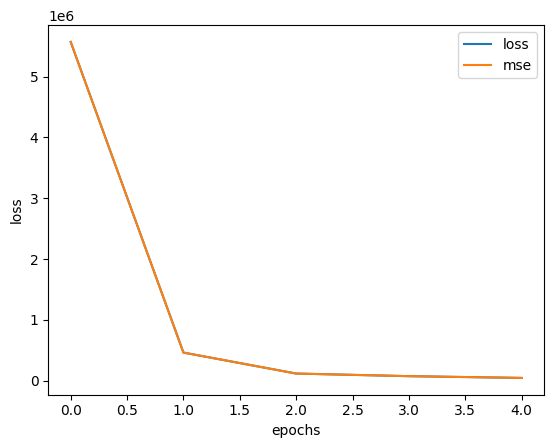

In [85]:
 pd.DataFrame(rec.history).plot()
 plt.ylabel("loss")
 plt.xlabel("epochs")